### **AUTOMOTIVE PREDICTOR**

#### **Life cycle of Machine learning Project**  

- Understanding the Problem Statement

- Data Collection 

- Data Checks to perform

- Exploratory data analysis

- Data Pre-Processing

- Model Training

- Choose best mode

## **Business Intelligence and Business Analysis** 
The automotive industry continually strives to enhance vehicle reliability and minimize unexpected breakdowns. Traditional maintenance schedules often fail to account for the unique usage patterns and conditions each vehicle experiences, leading to inefficiencies and potential safety risks.

In the context of automotive components, there is a need for a predictive maintenance system that can anticipate failures and maintenance requirements based on historical data. This project aims to leverage a comprehensive dataset of over 90,000 used cars, spanning from 1970 to 2024, to develop a predictive model that identifies vehicles at high risk of failure. By predicting these maintenance needs, AutoPredict seeks to reduce downtime, optimize maintenance schedules, and ultimately improve vehicle safety and performance.

#### **Problem Statement** 
The challenge is to develop a predictive maintenance model that accurately forecasts automotive component failures using historical car data. This model aims to help in proactively addressing maintenance needs, thereby enhancing vehicle reliability, safety, and operational efficiency.



### **Goals** 
**Predict Failures:** Create a supervised learning model to predict the likelihood of automotive component failures based on features such as age, mileage, engine size, and fuel efficiency.

**Optimize Maintenance:** Use predictive insights to optimize maintenance schedules, reducing unnecessary maintenance actions and preventing unexpected breakdowns.

**Enhance Safety and Performance:** Improve overall vehicle safety and performance by ensuring timely maintenance interventions.



### **Creating a Synthetic Failure Label** 
The dataset does not include a direct feature for predicting failures. To address this, I created a synthetic failure label based on business knowledge and specific parameters. This label was generated using the following criteria:

**Age:** Vehicles older than 10 years are more likely to experience failures.

**Mileage:** Vehicles with mileage greater than 100,000 miles are more prone to maintenance needs.

**Combined Criteria:** Vehicles meeting both the age and mileage thresholds were labeled as likely to fail.



### **Features Included**

**Model:** The model of the car.

**Year:** The manufacturing year of the car.

**Price:** The price of the car.

**Transmission:** The type of transmission used in the car.

**Mileage:** The mileage of the car.

**FuelType:** The type of fuel used by the car.

**Tax:** The tax rate applicable to the car.

**MPG:** The miles per gallon efficiency of the car.

**EngineSize:** The size of the car's engine.

**Manufacturer:** The manufacturer of the car.

### Data collection
**Dataset source:** https://www.kaggle.com/datasets/meruvulikith/90000-cars-data-from-1970-to-2024

The data consists of: 10 columns but we would add 1 more and 97712 rows

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Load the data
df = pd.read_csv("/Users/kanayojustice/Documents/Data_scientist_projects/AutoPredict/research/data/CarsData.csv")

### Exploratory data analysis (EDA)

In [3]:
df.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford
5,C-HR,2019,26791,Automatic,2373,Hybrid,135,74.3,1.8,toyota
6,Kuga,2019,17990,Manual,7038,Petrol,145,34.4,1.5,ford
7,Tiguan,2019,27490,Semi-Auto,3000,Petrol,145,30.4,2.0,volkswagen
8,Fiesta,2018,9891,Manual,31639,Petrol,145,65.7,1.0,ford
9,A Class,2017,17498,Manual,9663,Diesel,30,62.8,2.1,merc


In [4]:
df.shape

(97712, 10)

In [5]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,97712.000000,97712.000000,97712.000000,97712.000000,97712.000000,97712.000000
mean,2017.066502,16773.487555,23219.475499,120.142408,55.205623,1.664913
std,2.118661,9868.552222,21060.882301,63.357250,16.181659,0.558574
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,9999.000000,7673.000000,125.000000,47.100000,1.200000
50%,2017.000000,14470.000000,17682.500000,145.000000,54.300000,1.600000
75%,2019.000000,20750.000000,32500.000000,145.000000,62.800000,2.000000
max,2024.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         97712 non-null  int64  
 3   transmission  97712 non-null  object 
 4   mileage       97712 non-null  int64  
 5   fuelType      97712 non-null  object 
 6   tax           97712 non-null  int64  
 7   mpg           97712 non-null  float64
 8   engineSize    97712 non-null  float64
 9   Manufacturer  97712 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.5+ MB


In [7]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Manufacturer    0
dtype: int64

#### **Insights** 

- The dataset has 4 coloumns as object type and we have to OHE (One Hot Encode)
- The dataset has no missing values
- The dataset contains (97712: rows, 10: coloumns)

In [8]:
# Convert all column names to lowercase
df.columns = df.columns.str.lower()

In [9]:
# Display basic information about the dataset
print("Data Information:")
df.info()


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         97712 non-null  int64  
 3   transmission  97712 non-null  object 
 4   mileage       97712 non-null  int64  
 5   fueltype      97712 non-null  object 
 6   tax           97712 non-null  int64  
 7   mpg           97712 non-null  float64
 8   enginesize    97712 non-null  float64
 9   manufacturer  97712 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.5+ MB


In [10]:
# Display the first few rows of the dataset
print("\nFirst 10 rows of the dataset:")
print(df.head(10))


First 10 rows of the dataset:
           model  year  price transmission  mileage fueltype  tax   mpg  \
0            I10  2017   7495       Manual    11630   Petrol  145  60.1   
1           Polo  2017  10989       Manual     9200   Petrol  145  58.9   
2       2 Series  2019  27990    Semi-Auto     1614   Diesel  145  49.6   
3   Yeti Outdoor  2017  12495       Manual    30960   Diesel  150  62.8   
4         Fiesta  2017   7999       Manual    19353   Petrol  125  54.3   
5           C-HR  2019  26791    Automatic     2373   Hybrid  135  74.3   
6           Kuga  2019  17990       Manual     7038   Petrol  145  34.4   
7         Tiguan  2019  27490    Semi-Auto     3000   Petrol  145  30.4   
8         Fiesta  2018   9891       Manual    31639   Petrol  145  65.7   
9        A Class  2017  17498       Manual     9663   Diesel   30  62.8   

   enginesize manufacturer  
0         1.0       hyundi  
1         1.0   volkswagen  
2         2.0          BMW  
3         2.0        skoda 

In [11]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
model           0
year            0
price           0
transmission    0
mileage         0
fueltype        0
tax             0
mpg             0
enginesize      0
manufacturer    0
dtype: int64


In [12]:
# Summary statistics of the dataset
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
               year          price        mileage           tax           mpg  \
count  97712.000000   97712.000000   97712.000000  97712.000000  97712.000000   
mean    2017.066502   16773.487555   23219.475499    120.142408     55.205623   
std        2.118661    9868.552222   21060.882301     63.357250     16.181659   
min     1970.000000     450.000000       1.000000      0.000000      0.300000   
25%     2016.000000    9999.000000    7673.000000    125.000000     47.100000   
50%     2017.000000   14470.000000   17682.500000    145.000000     54.300000   
75%     2019.000000   20750.000000   32500.000000    145.000000     62.800000   
max     2024.000000  159999.000000  323000.000000    580.000000    470.800000   

         enginesize  
count  97712.000000  
mean       1.664913  
std        0.558574  
min        0.000000  
25%        1.200000  
50%        1.600000  
75%        2.000000  
max        6.600000  


In [13]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fueltype', 'tax',
       'mpg', 'enginesize', 'manufacturer'],
      dtype='object')

#### Value counts for categorical columns

In [14]:

# Get value counts for the 'model' column

pd.set_option('display.max_rows', None)
model_value_counts = df['model'].value_counts()

# Print the value counts for the 'model' column
print("Value counts for column 'model':")
print(model_value_counts)

Value counts for column 'model':
model
 Fiesta                   6509
 Golf                     4797
 Focus                    4555
 C Class                  3694
 Corsa                    3285
 Polo                     3244
 Astra                    2655
 A Class                  2474
 3 Series                 2434
 Kuga                     2208
 Yaris                    2117
 Mokka X                  2111
 1 Series                 1962
 Aygo                     1940
 E Class                  1927
 A3                       1917
 Tiguan                   1743
 Fabia                    1544
 Octavia                  1466
 Q3                       1379
 A4                       1375
 A1                       1337
 Tucson                   1280
 2 Series                 1188
 EcoSport                 1127
 I10                      1061
 5 Series                 1051
 Insignia                 1015
 4 Series                  986
 GLC Class                 935
 Passat                    878


In [15]:

# Get value counts for the 'model' column

pd.set_option('display.max_rows', None)
year_value_counts = df['year'].value_counts()


# Print the value counts for the 'model' column
print("Value counts for column 'year':")
print(year_value_counts)

Value counts for column 'year':
year
2019    26165
2017    21616
2016    15724
2018    13570
2015     7586
2014     4053
2020     4040
2013     2590
2012      633
2011      432
2010      340
2009      277
2008      199
2007      163
2006       86
2005       69
2004       52
2003       34
2002       31
2001       20
2000        9
1998        8
1999        6
1997        4
1996        2
1970        2
2024        1
Name: count, dtype: int64


In [16]:

# Get value counts for the 'model' column

pd.set_option('display.max_rows', None)
fueltype_value_counts = df['fueltype'].value_counts()


# Print the value counts for the 'model' column
print("Value counts for column 'fueltype':")
print(fueltype_value_counts)

Value counts for column 'fueltype':
fueltype
Petrol      53982
Diesel      40419
Hybrid       3059
Other         246
Electric        6
Name: count, dtype: int64


In [17]:

# Get value counts for the 'model' column

pd.set_option('display.max_rows', None)
transmission_value_counts = df['transmission'].value_counts()


# Print the value counts for the 'model' column
print("Value counts for column 'transmission':")
print(transmission_value_counts)

Value counts for column 'transmission':
transmission
Manual       55502
Semi-Auto    22296
Automatic    19905
Other            9
Name: count, dtype: int64


In [18]:

# Get value counts for the 'model' column

pd.set_option('display.max_rows', None)
manufacturer_value_counts = df['manufacturer'].value_counts()


# Print the value counts for the 'model' column
print("Value counts for column 'manufacturer':")
print(manufacturer_value_counts)

Value counts for column 'manufacturer':
manufacturer
ford          17811
volkswagen    14893
vauxhall      13258
merc          12860
BMW           10664
Audi          10565
toyota         6699
skoda          6188
hyundi         4774
Name: count, dtype: int64


#### **Insights** 

- Though dataset fromm Kaggle's description mentioned the data would range from 1970 until 2024, we can clearly see the data we have from the 70's are fewer in comparison to late 2000's


### Visualizations & Feature Engineering

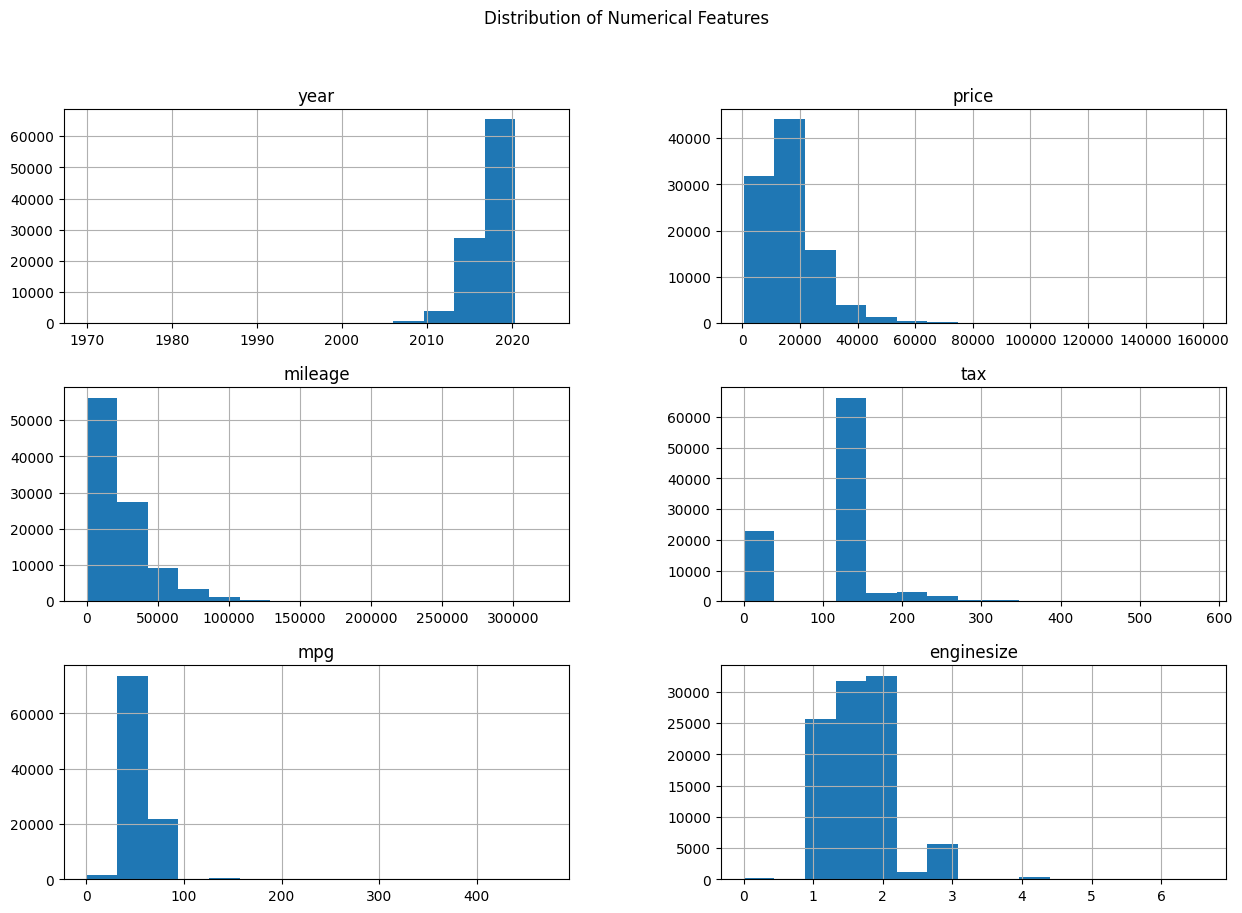

In [19]:
# Distribution of numerical features
numerical_features = ['year', 'price', 'mileage', 'tax', 'mpg', 'enginesize']
df[numerical_features].hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
# Save the figure
save_path = '/Users/kanayojustice/Documents/Data_scientist_projects/AutoPredict/research/visualisations/numerical_features_distribution.png'
plt.savefig(save_path)
plt.show()


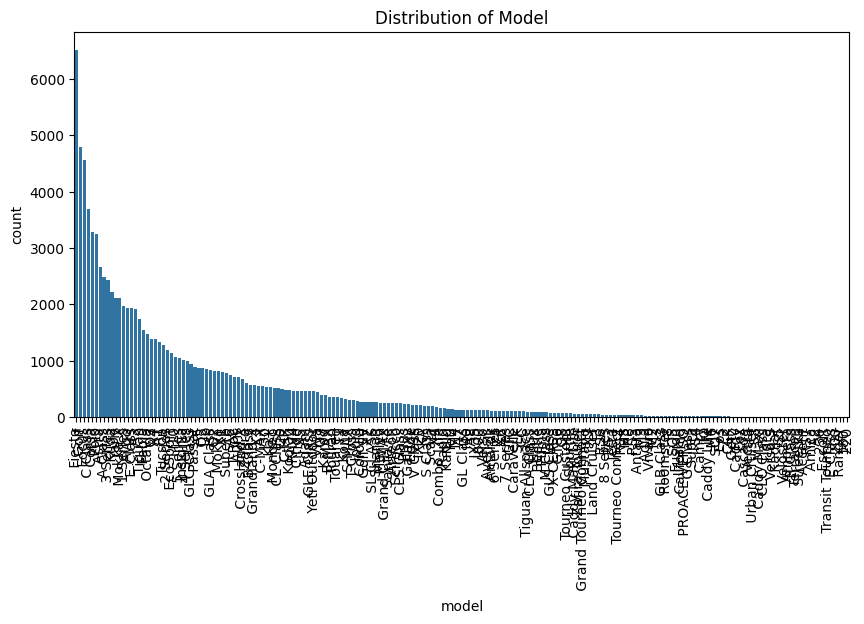

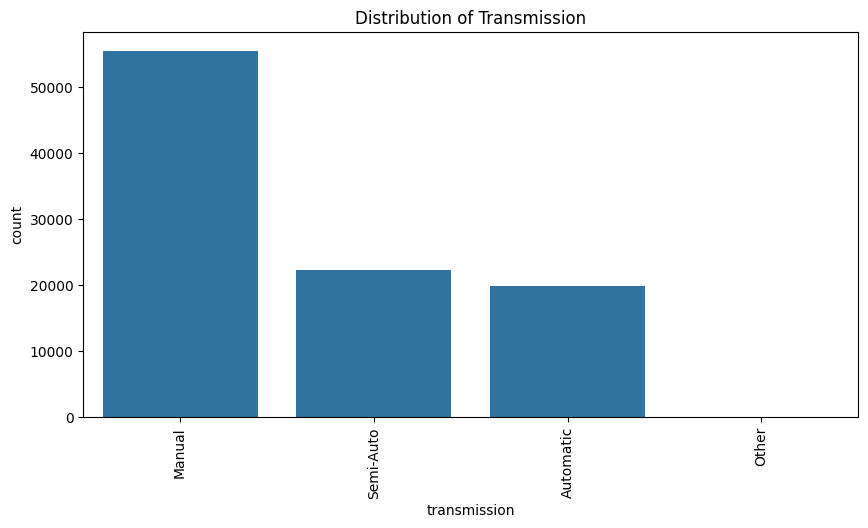

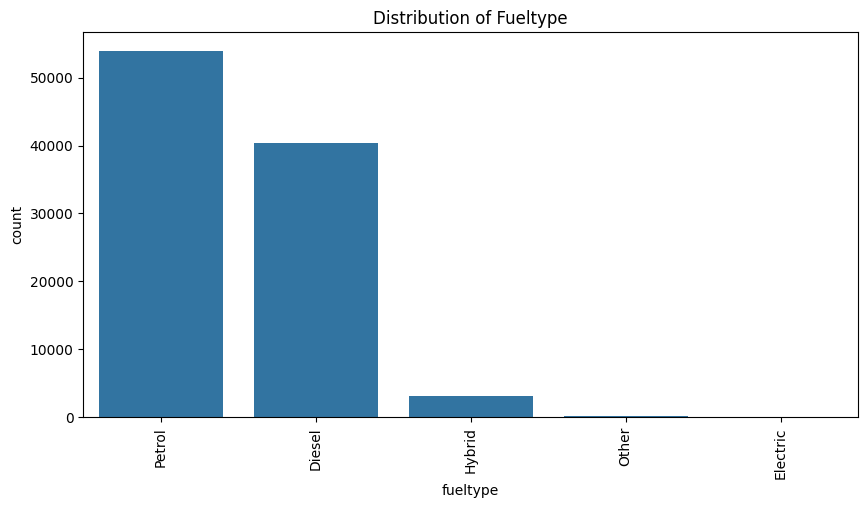

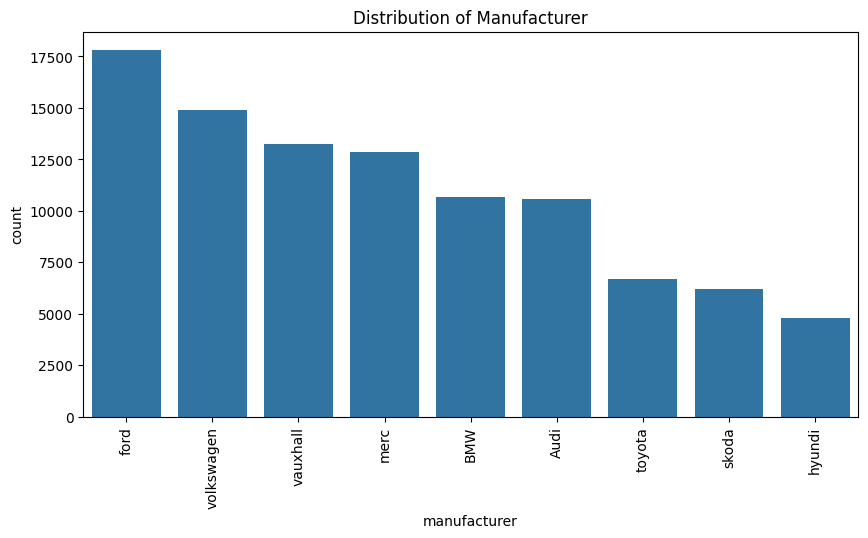

In [20]:
# Path to save visualizations
save_dir = '/Users/kanayojustice/Documents/Data_scientist_projects/AutoPredict/research/visualisations/'

# Count of categorical features
categorical_features = ['model', 'transmission', 'fueltype', 'manufacturer']
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index)
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.xticks(rotation=90)

    # Save the figure
    save_path = f'{save_dir}{feature}_distribution.png'
    plt.savefig(save_path)
    plt.show()


## Feature engineering 

##### Working hand in hand with a business analyst/ stakeholder we must create a threshold here in whose Aim is to create a "Fail" label based off some given rules through buisness intelligence.

In [21]:
# Analyzing the relationship between features and the target variable
current_year = datetime.now().year
df['fail'] = df.apply(lambda row: 'yes' if (current_year - row['year'] > 10 or row['mileage'] > 100000) else 'no', axis=1)


In [22]:
df.head(10)

,model,year,price,transmission,mileage,fueltype,tax,mpg,enginesize,manufacturer,fail
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi,no
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen,no
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW,no
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda,no
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford,no
5,C-HR,2019,26791,Automatic,2373,Hybrid,135,74.3,1.8,toyota,no
6,Kuga,2019,17990,Manual,7038,Petrol,145,34.4,1.5,ford,no
7,Tiguan,2019,27490,Semi-Auto,3000,Petrol,145,30.4,2.0,volkswagen,no
8,Fiesta,2018,9891,Manual,31639,Petrol,145,65.7,1.0,ford,no
9,A Class,2017,17498,Manual,9663,Diesel,30,62.8,2.1,merc,no


In [23]:
filtered_df = df[df['fail'] == 'yes']
filtered_df.head()

,model,year,price,transmission,mileage,fueltype,tax,mpg,enginesize,manufacturer,fail
33,Mondeo,2015,6391,Manual,142000,Diesel,20,68.9,2.0,ford,yes
60,B-MAX,2013,5698,Manual,44901,Petrol,145,47.1,1.4,ford,yes
67,Corsa,2008,1750,Manual,84490,Diesel,30,62.8,1.2,vauxhall,yes
99,Focus,2011,3995,Automatic,66164,Petrol,205,42.2,1.6,ford,yes
109,Q3,2013,11699,Manual,36954,Diesel,145,54.3,2.0,Audi,yes


In [24]:
# Count the occurrences of 'yes' and 'no' in the 'fail' column
fail_counts = df['fail'].value_counts()
print("\nCount of 'fail' labels:")
print(fail_counts)


Count of 'fail' labels:
fail
no     92458
yes     5254
Name: count, dtype: int64


##### The "Fial" column against some other labels

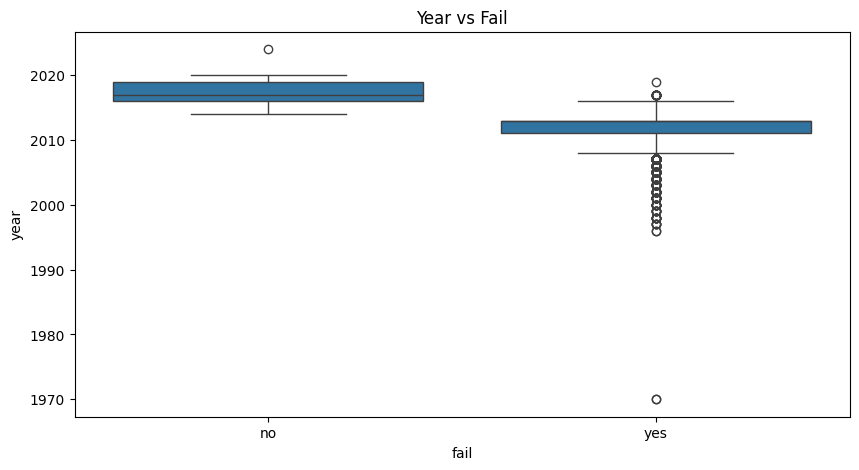

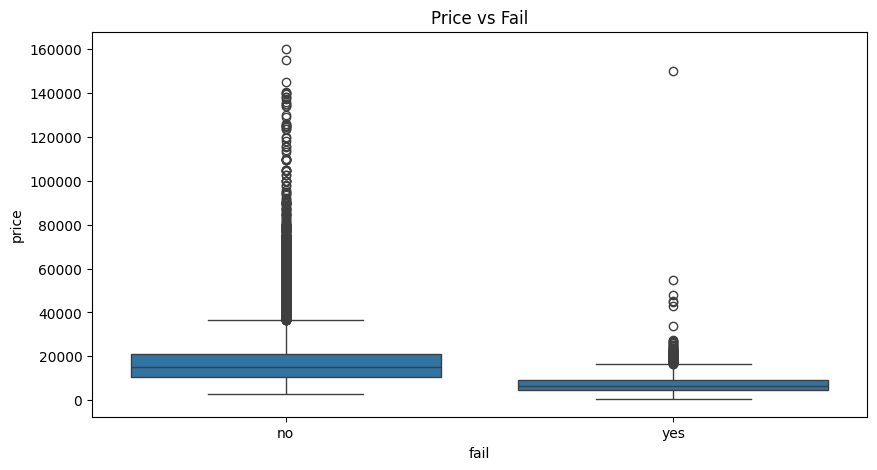

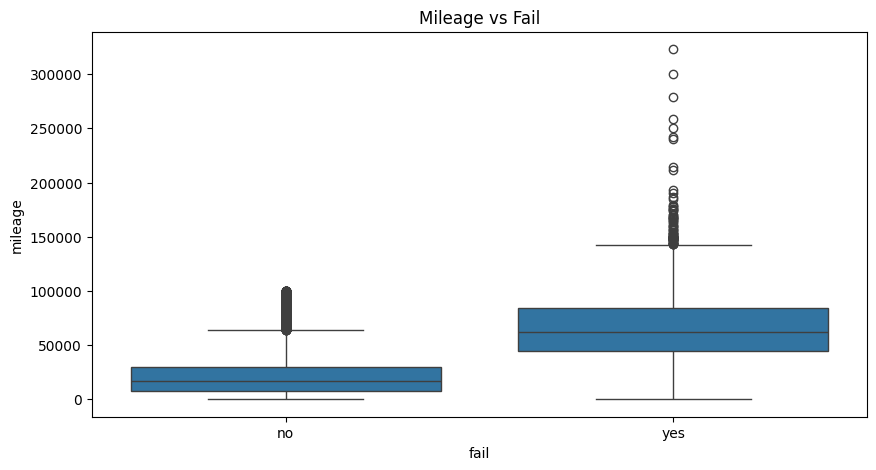

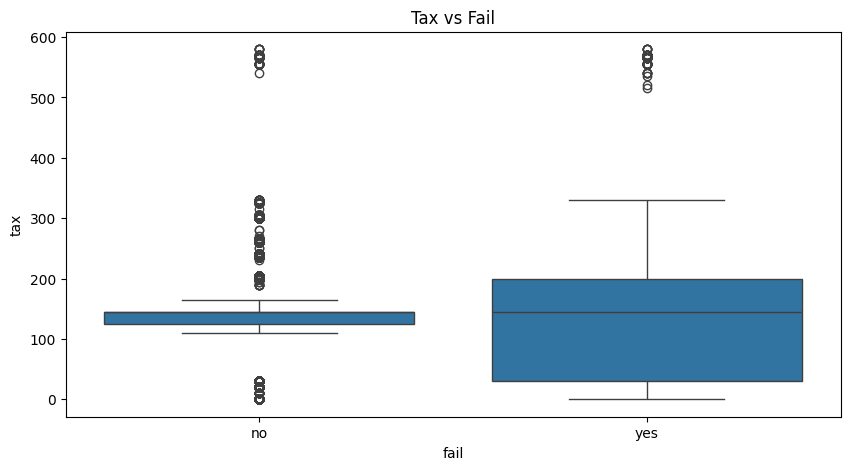

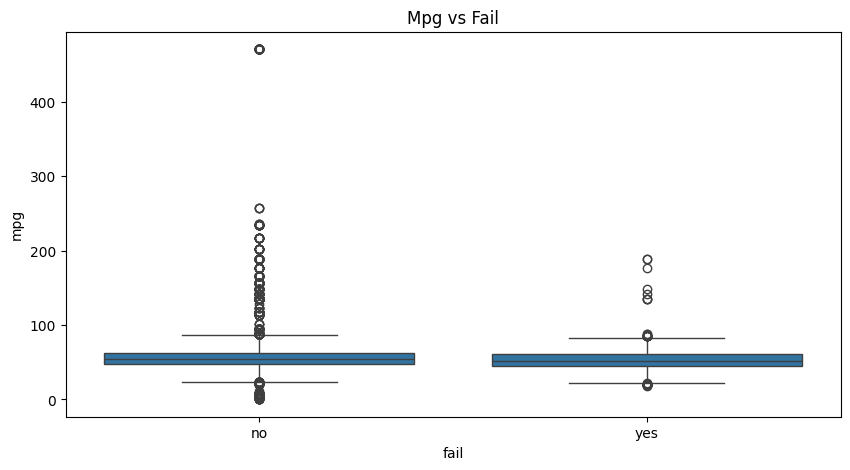

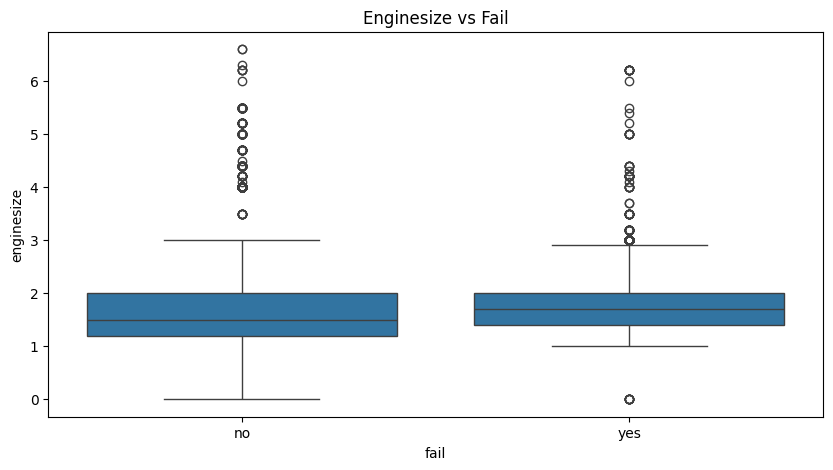

In [25]:
# Path to save visualizations
save_dir = '/Users/kanayojustice/Documents/Data_scientist_projects/AutoPredict/research/visualisations/'

# Visualize the relationship between 'fail' and numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x='fail', y=feature)
    plt.title(f'{feature.capitalize()} vs Fail')
    # Save the figure
    save_path = f'{save_dir}{feature}_vs_fail_boxplot.png'
    plt.savefig(save_path)
    plt.show()


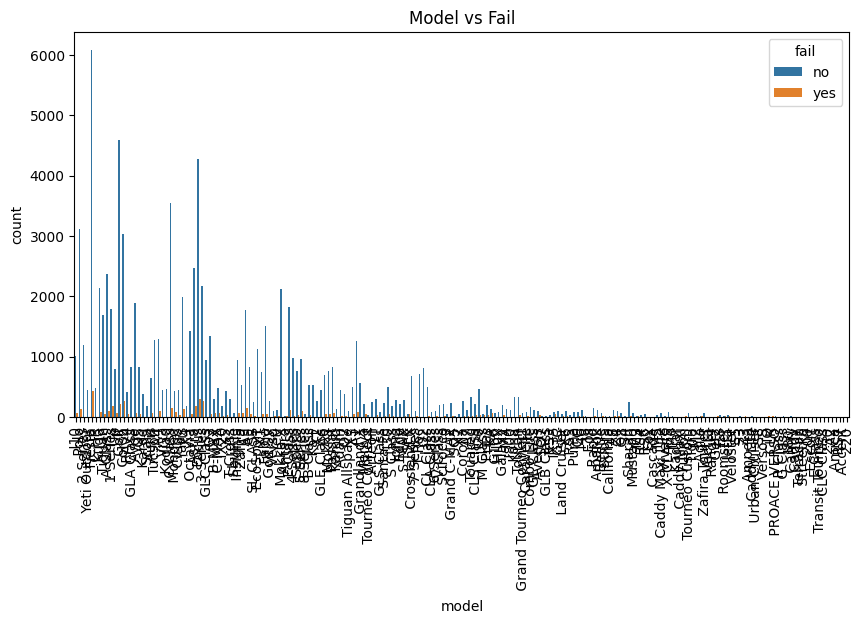

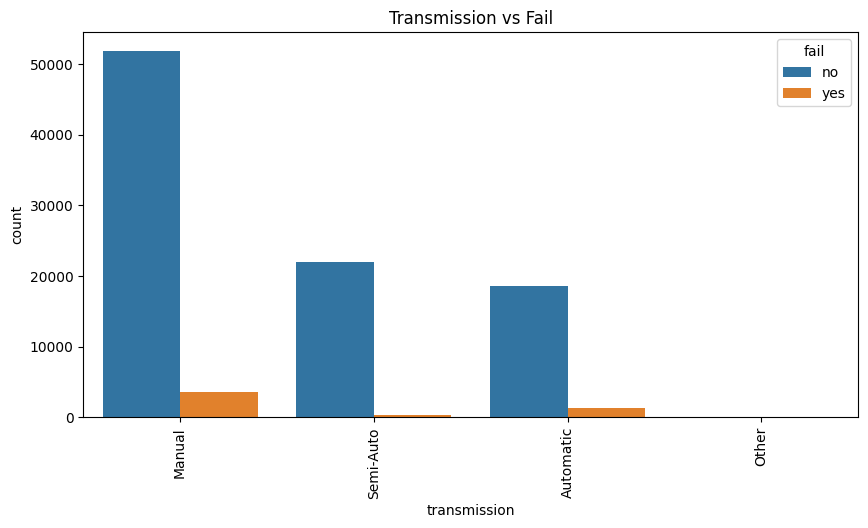

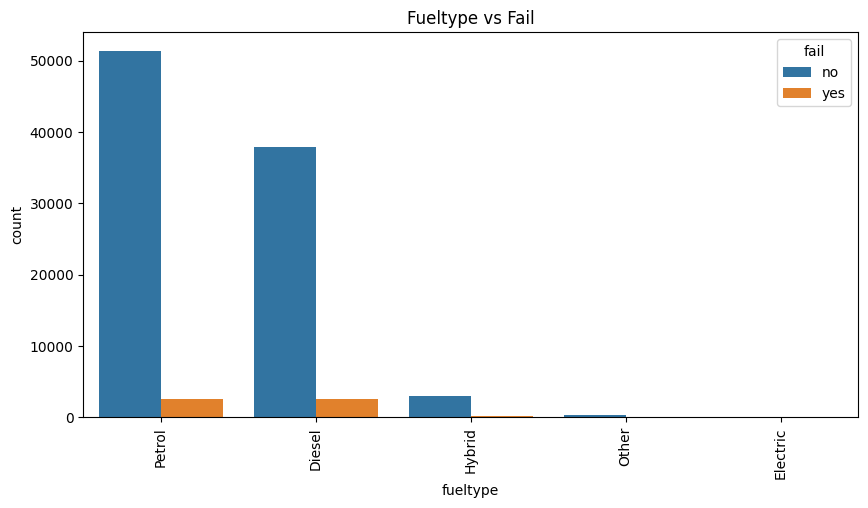

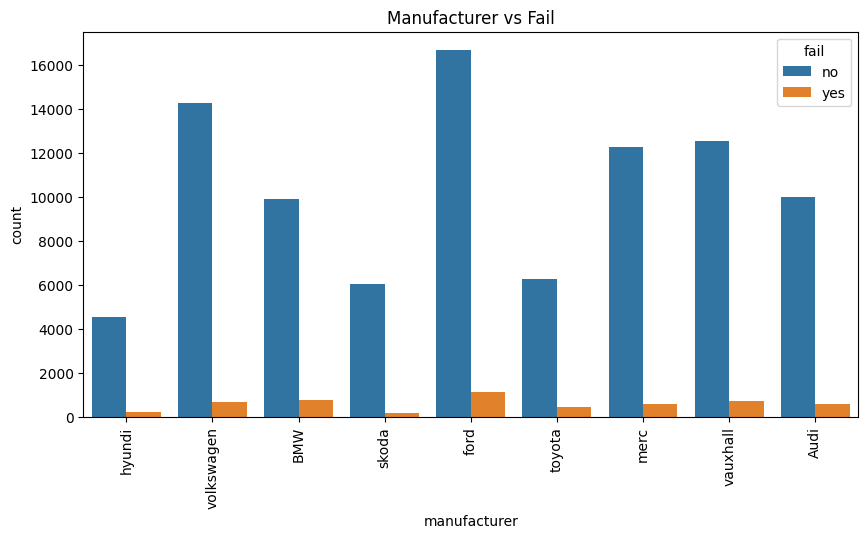

In [26]:
# Path to save visualizations
save_dir = '/Users/kanayojustice/Documents/Data_scientist_projects/AutoPredict/research/visualisations/'

# Visualize the relationship between 'fail' and categorical features
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=feature, hue='fail')
    plt.title(f'{feature.capitalize()} vs Fail')
    plt.xticks(rotation=90)
    # Save the figure
    save_path = f'{save_dir}{feature}_vs_fail_countplot.png'
    plt.savefig(save_path)
    plt.show()

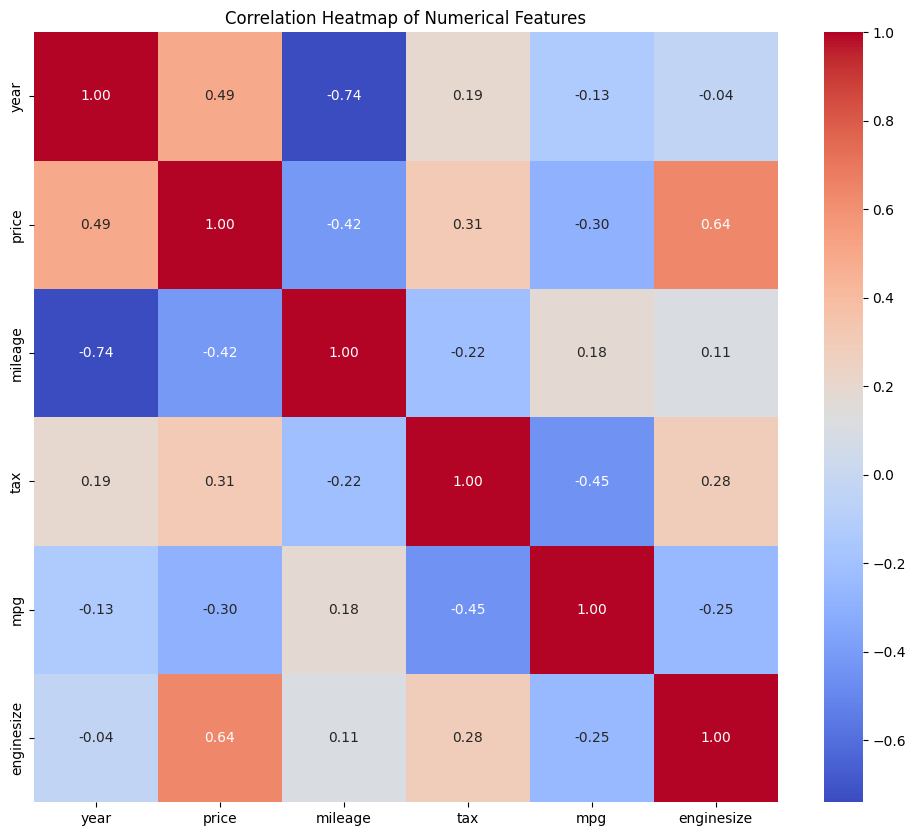

In [27]:
# Path to save visualizations
save_dir = '/Users/kanayojustice/Documents/Data_scientist_projects/AutoPredict/research/visualisations/'

# Heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_features].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')

# Save the figure
save_path = f'{save_dir}numerical_features_correlation_heatmap.png'
plt.savefig(save_path)
plt.show()

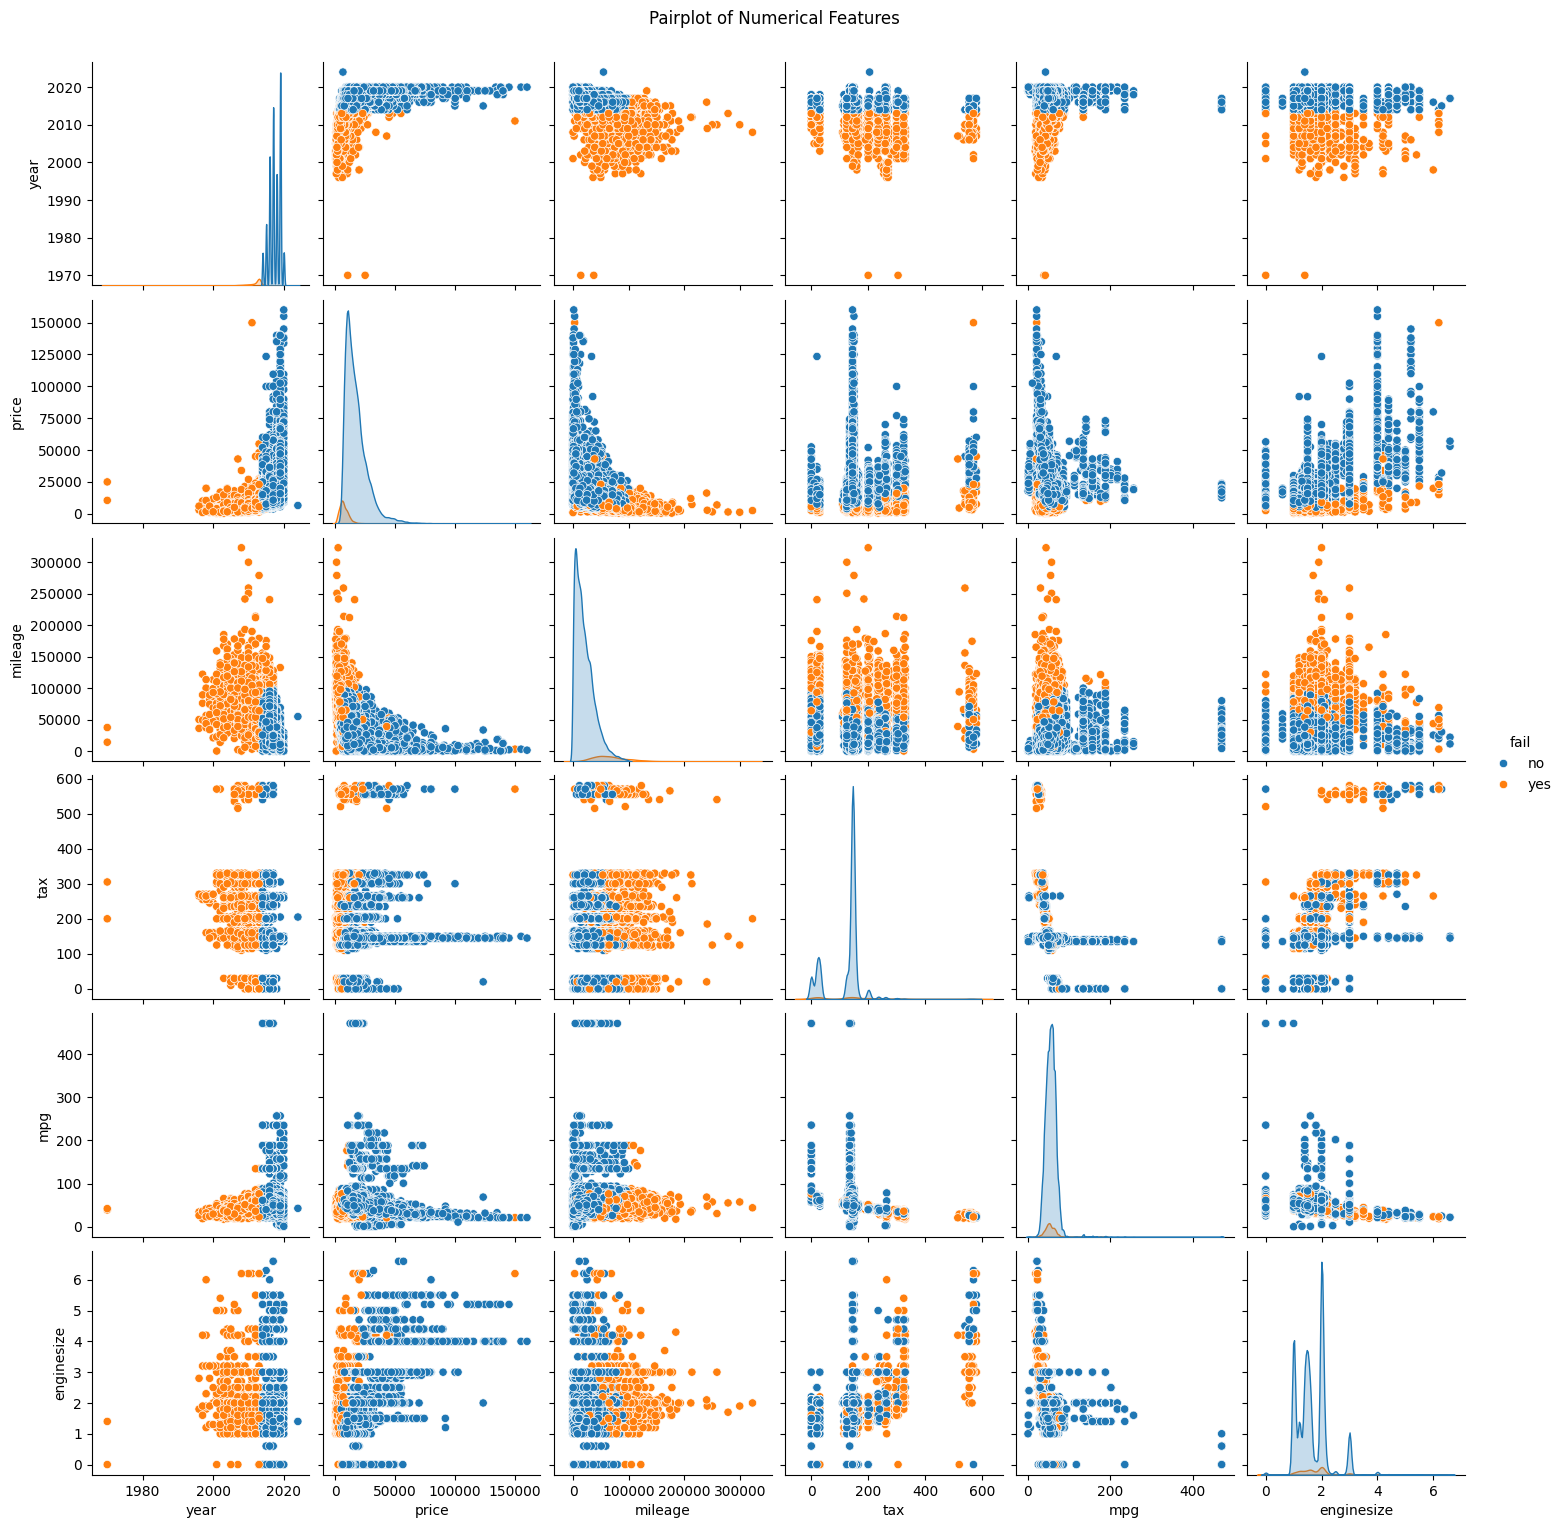

In [28]:
# Path to save visualizations
save_dir = '/Users/kanayojustice/Documents/Data_scientist_projects/AutoPredict/research/visualisations/'

# Pairplot for numerical features
sns.pairplot(df, vars=numerical_features, hue='fail')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
# Save the figure
save_path = f'{save_dir}numerical_features_correlation_heatmap.png'
plt.savefig(save_path)
plt.show()

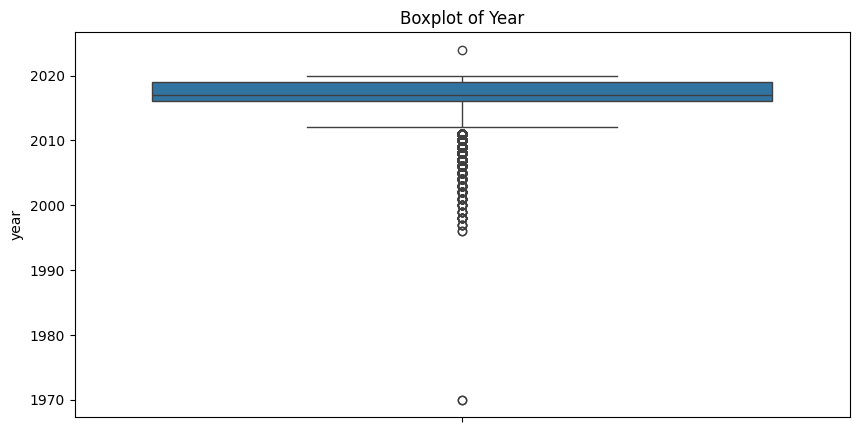

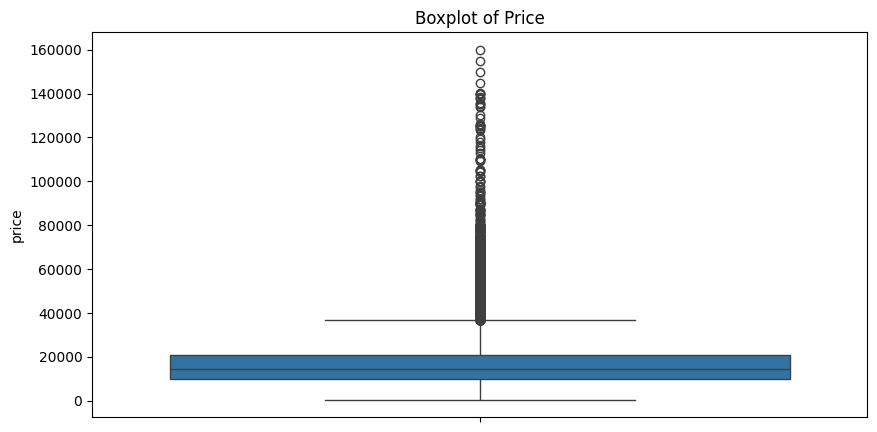

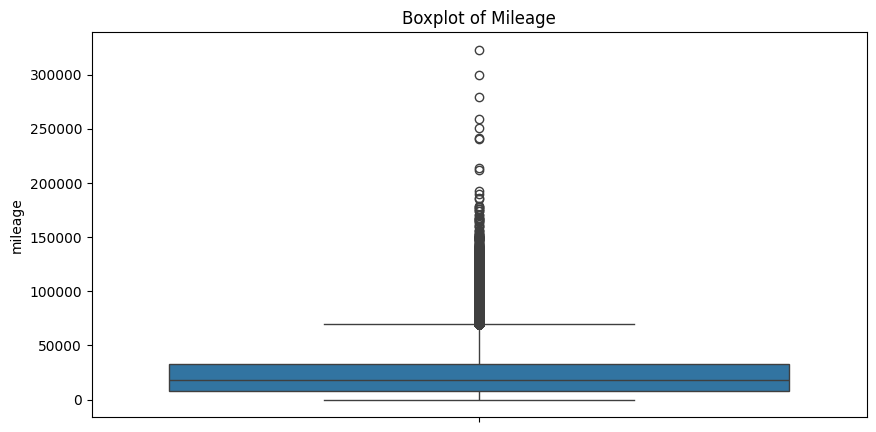

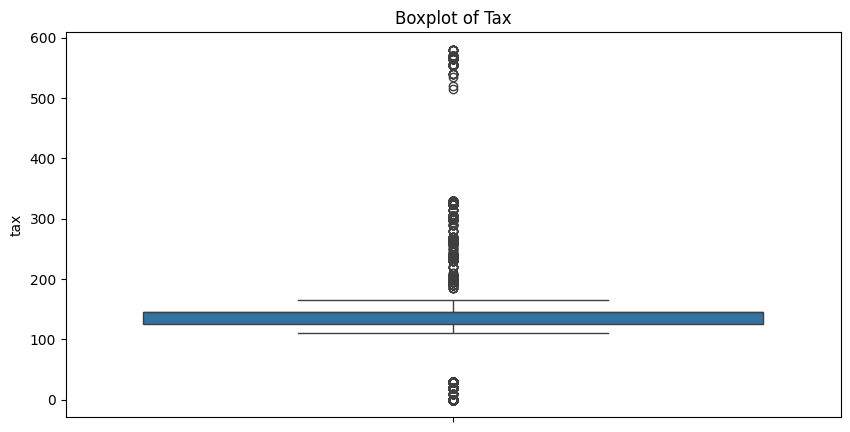

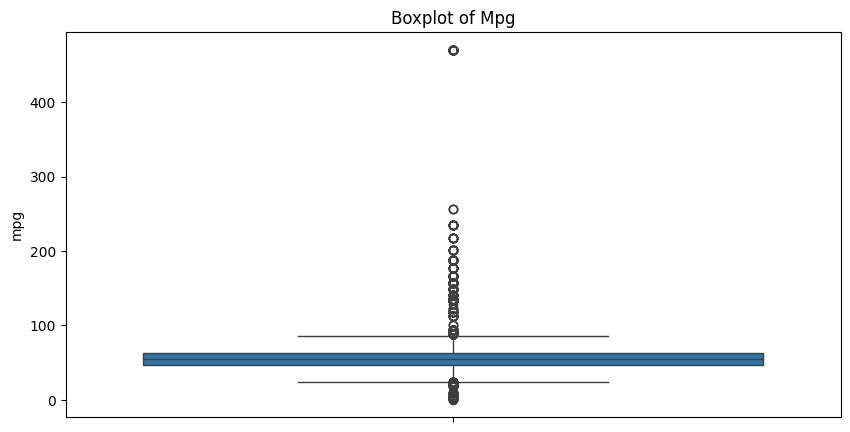

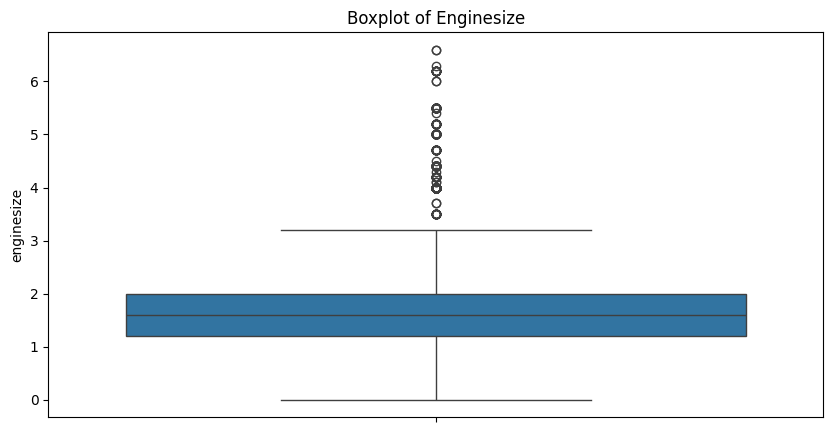

In [29]:
# Path to save visualizations
save_dir = '/Users/kanayojustice/Documents/Data_scientist_projects/AutoPredict/research/visualisations/'

# Boxplots to detect outliers in numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df[feature])
    plt.title(f'Boxplot of {feature.capitalize()}')
    # Save the figure
    save_path = f"{save_dir}boxplot_{feature}.png"
    plt.savefig(save_path)
    plt.show()

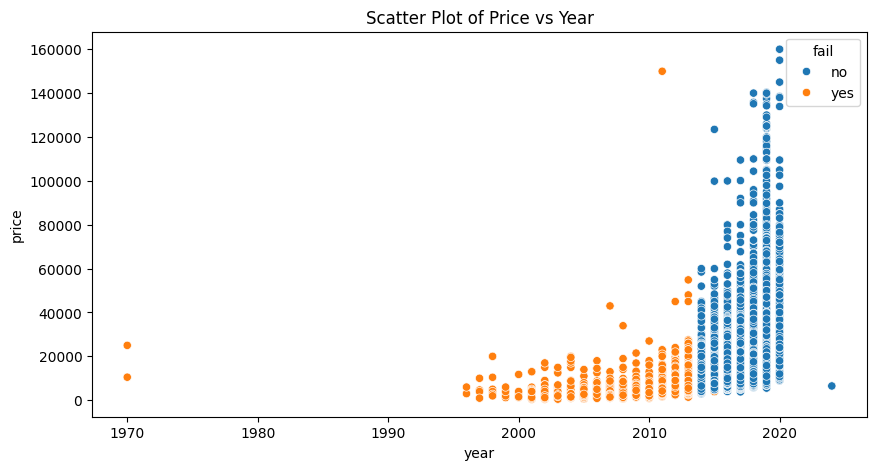

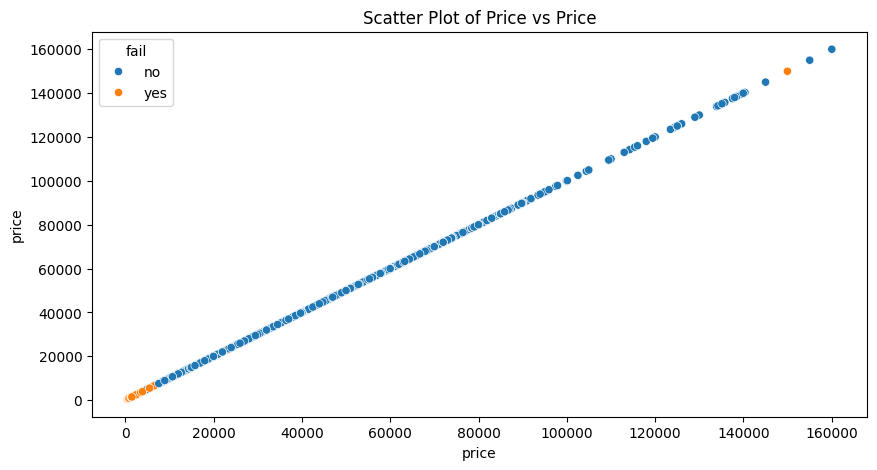

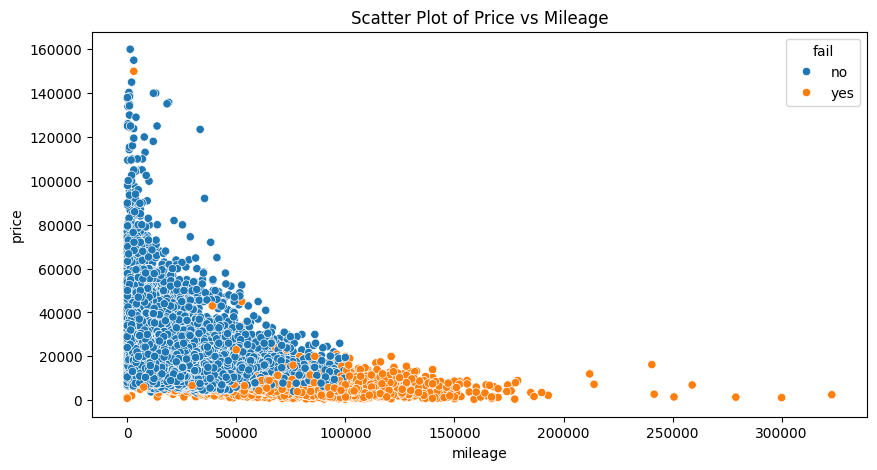

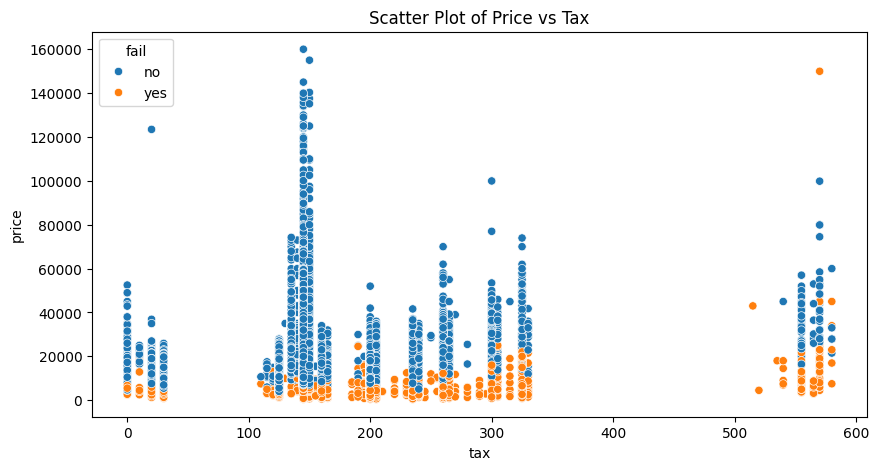

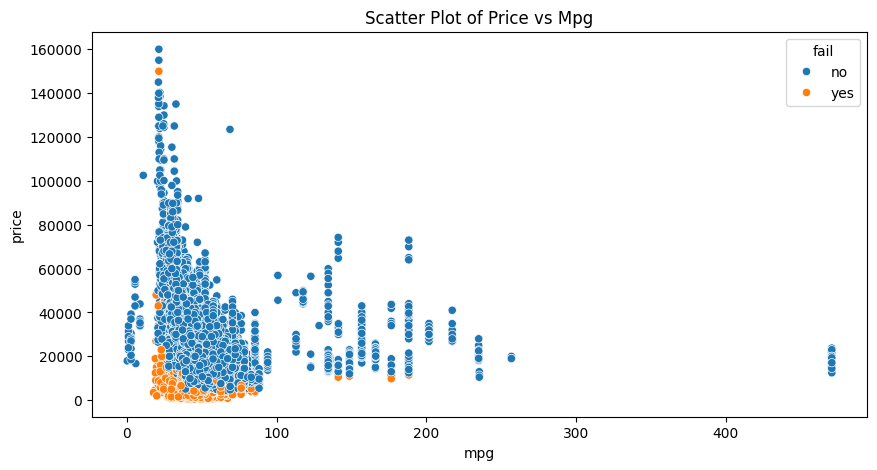

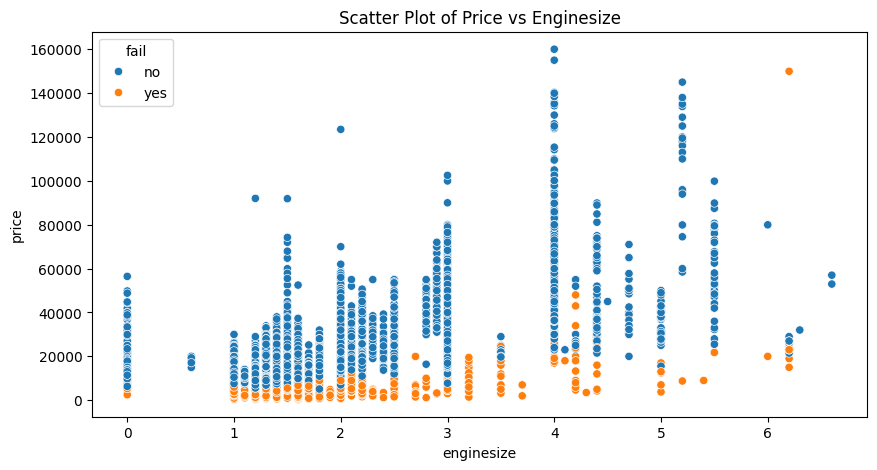

In [30]:
# Path to save visualizations
save_dir = '/Users/kanayojustice/Documents/Data_scientist_projects/AutoPredict/research/visualisations/'

# Scatter plots to visualize relationships between numerical features and the target
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=df, x=feature, y='price', hue='fail')
    plt.title(f'Scatter Plot of Price vs {feature.capitalize()}')
    # Save the figure
    save_path = f"{save_dir}scatterplot_price_vs_{feature}.png"
    plt.savefig(save_path)
    plt.show()

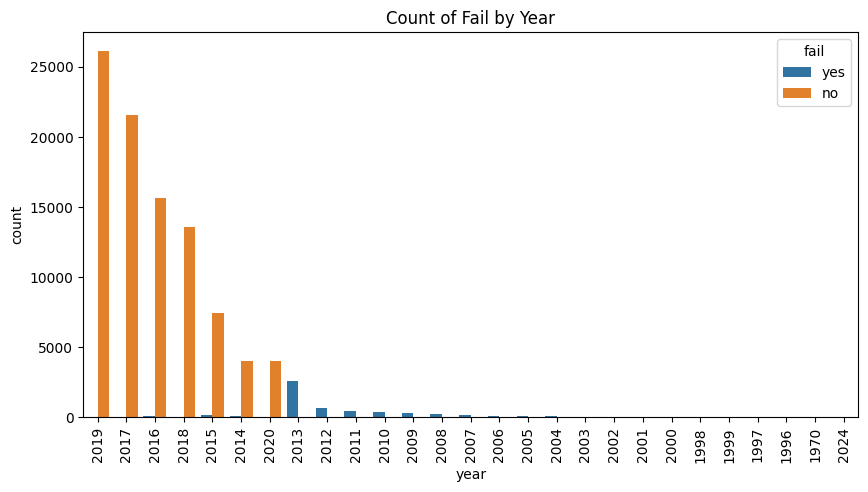

In [31]:
# Path to save visualizations
save_dir = '/Users/kanayojustice/Documents/Data_scientist_projects/AutoPredict/research/visualisations/'

# Count of fail by year
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='year', hue='fail', order=df['year'].value_counts().index)
plt.title('Count of Fail by Year')
plt.xticks(rotation=90)
# Save the figure
save_path = f"{save_dir}countplot_fail_by_year.png"
plt.savefig(save_path)
plt.show()

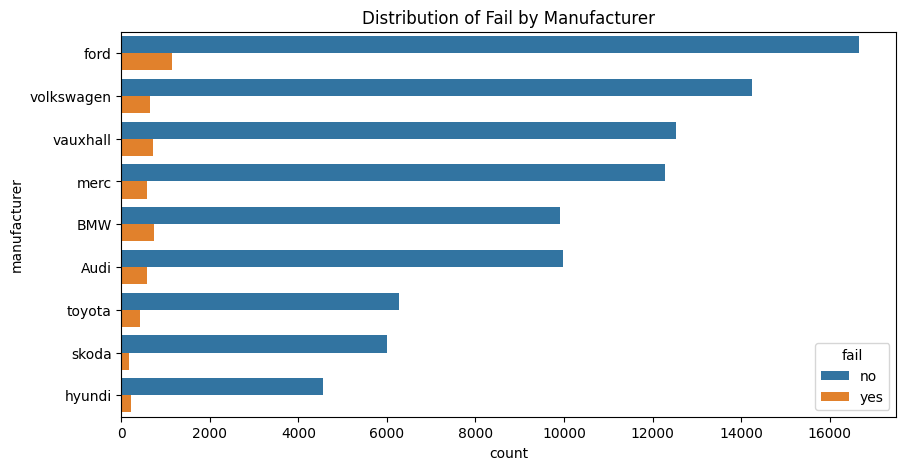

In [32]:
# Distribution of fail by manufacturer
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='manufacturer', hue='fail', order=df['manufacturer'].value_counts().index)
plt.title('Distribution of Fail by Manufacturer')
# Save the figure
save_path = "/Users/kanayojustice/Documents/Data_scientist_projects/AutoPredict/research/visualisations/countplot_fail_by_manufacturer.png"
plt.savefig(save_path)

plt.show()

In [33]:
# Save the cleaned data to a new CSV file without one-hot encoding
df.to_csv("/Users/kanayojustice/Documents/Data_scientist_projects/AutoPredict/research/data/EDA_cars_data.csv", index=False)
print("\nCleaned data saved to 'EDA_Cars_data.csv'")



Cleaned data saved to 'EDA_Cars_data.csv'


In [34]:
# Display the first few rows of the cleaned dataset
print("\nFirst 10 rows of the cleaned dataset:")
print(df.head(10))


First 10 rows of the cleaned dataset:
           model  year  price transmission  mileage fueltype  tax   mpg  \
0            I10  2017   7495       Manual    11630   Petrol  145  60.1   
1           Polo  2017  10989       Manual     9200   Petrol  145  58.9   
2       2 Series  2019  27990    Semi-Auto     1614   Diesel  145  49.6   
3   Yeti Outdoor  2017  12495       Manual    30960   Diesel  150  62.8   
4         Fiesta  2017   7999       Manual    19353   Petrol  125  54.3   
5           C-HR  2019  26791    Automatic     2373   Hybrid  135  74.3   
6           Kuga  2019  17990       Manual     7038   Petrol  145  34.4   
7         Tiguan  2019  27490    Semi-Auto     3000   Petrol  145  30.4   
8         Fiesta  2018   9891       Manual    31639   Petrol  145  65.7   
9        A Class  2017  17498       Manual     9663   Diesel   30  62.8   

   enginesize manufacturer fail  
0         1.0       hyundi   no  
1         1.0   volkswagen   no  
2         2.0          BMW   no  